# Experiments with the dynamic model

A region contaning one or more contaminated sites.

Each contaminated site is treated as a **task**.

Site may be contaminated by one or more dangerous products.

Every product is assumed to have a **risk** and a **transition rate** attribute.

Products may transform into one another at a **deterministic** rate:

  - A $\rightarrow$ B $\rightarrow$ C


On-site operations (different **duration**):
 - **Neutralize** a *target* product
 - **Remove** *all* products

A task is **completed** if product concentration falls bellow a threshold $\epsilon$.

Minimize the different **objective functions**:
 - Global risk
 - Max risk at any given time
 - Makespan



## Code for generating plots (risk and concentration)

In [1]:
from math import isclose
from itertools import product as prod

import matplotlib.pyplot as plt

from optlis import import_solution
from optlis.dynamic import load_instance


def _risk_at_time(inst, sol, t):
    tasks = inst.tasks
    risk = inst.risk
    products = inst.products
    return sum(
        sol.get(f"w_{i}_{p}_{t}", 0) * risk[p] for i, p in prod(tasks, products)
    )


def _plot_risk_by_time(ax, instance, solution, alpha=0.8):
    """Plot a graph for the risk vs. time."""
    makespan = solution.get("makespan")
    x = list(range(1, makespan + 1))
    y = []
    for t in range(1, makespan + 1):
        y.append(_risk_at_time(instance, solution, t))

    ax.fill_between(x, y, alpha=alpha, label="Global risk")

    ax.legend(loc="upper right")
    ax.set(xlabel="time", ylabel="risk")
    ax.set_title("Risk over time")


def _concentration_at_time(inst, sol, p, t):
    return sum(
        sol.get(f"w_{i}_{p}_{t}", 0) for i in inst.tasks
    )


def _plot_concentration_by_time(ax, instance, solution, alpha=0.8):
    """Plot a graph for products' concentration vs. time."""
    makespan = solution.get("makespan")
    products = instance.products
    x = list(range(1, makespan + 1))

    for p in products:
        y = []
        for t in range(1, makespan + 1):
            y.append(_concentration_at_time(instance, solution, p, t))
        ax.fill_between(x, y, alpha=alpha, label=f"Product {p}")

    ax.set_title("Concentration over time")
    ax.set(xlabel="time", ylabel="concentration")
    ax.legend(loc="upper right")


def plot_graphs(instance_path, sol_path):
    instance = load_instance(instance_path)
    solution = import_solution(sol_path)

    print(f"Instance {instance_path} ", end="")
    print(f"(global risk = {solution.get('global_risk') : .5f}, ", end="")
    print(f"makespan = {solution.get('makespan')})")

    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    _plot_risk_by_time(axs[0], instance, solution)
    _plot_concentration_by_time(axs[1], instance, solution)

    plt.show()

## Experiments

Instance ../data/instances/stable.dat (global risk =  38.15000, makespan = 55)


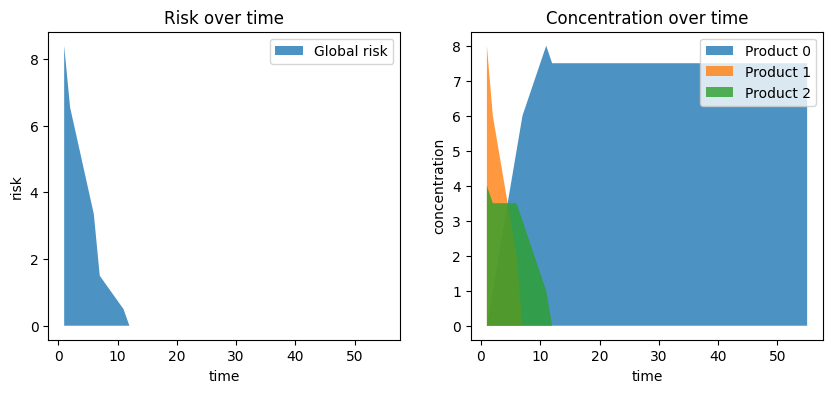

Instance ../data/instances/increasing.dat (global risk =  40.48386, makespan = 55)


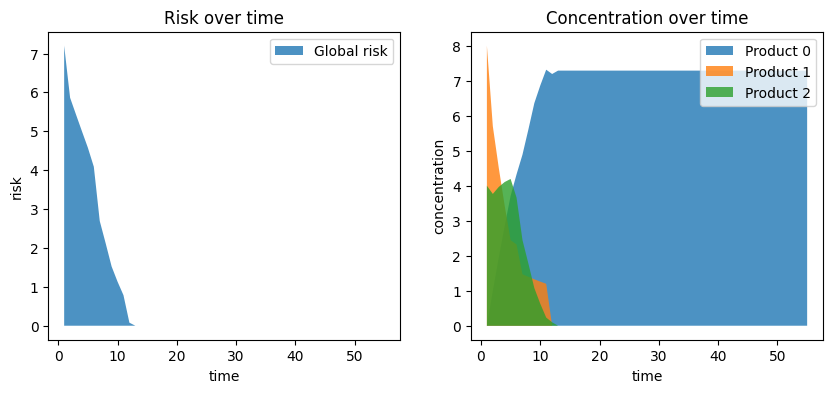

Instance ../data/instances/decreasing.dat (global risk =  38.06584, makespan = 55)


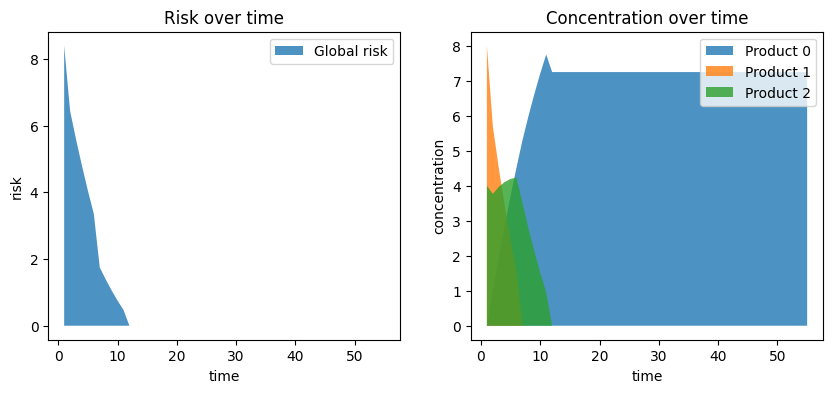

In [18]:
# import sys
# from IPython.utils import io

for instance_name in ("stable", "increasing", "decreasing"):
    plot_graphs(
        f"../data/instances/{instance_name}.dat",
        f"../data/solutions/{instance_name}.sol"
    )
